<a href="https://colab.research.google.com/github/Tejesh-25/Customer-Lead-Prediction/blob/Machine_Learning/Customer_lead_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

The online Edu-Tech platform that generates leads through various sources. The marketing and sales teams want to optimize their lead conversion rates and improve the efficiency of their lead management process. The primary goal is to predict whether a lead will be successfully converted into a customer or
not. This prediction can help the Edu-Tech company to prioritize leads with the highest conversion potential and tailor marketing and sales strategies accordingly. The analysis and prediction will be based on the information available in the provided dataset.

**Tools Used**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc

**Approaches**

In [ ]:
df=pd.read_csv("/content/Leads.csv")

In [ ]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**Removing Unwanted Columns**

In [ ]:
new_df=df.drop(['Tags','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Country','What matters most to you in choosing a course'],axis=1)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9204 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Last Activity                       

In [ ]:
new_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
new_df.shape

(9240, 31)

**Filling Missing Values**

In [ ]:
new_df['Specialization'].fillna(new_df['Specialization'].mode()[0],inplace=True)

In [ ]:
new_df['TotalVisits'].fillna(new_df['TotalVisits'].mean(),inplace=True)

In [ ]:
new_df['Lead Source'].fillna(new_df['Lead Source'].mode()[0],inplace=True)

In [ ]:
new_df['Page Views Per Visit'].fillna(new_df['Page Views Per Visit'].mean(),inplace=True)

In [ ]:
new_df['Last Activity'].fillna(new_df['Last Activity'].mode()[0],inplace=True)

In [ ]:
new_df['How did you hear about X Education'].fillna(new_df['How did you hear about X Education'].mode()[0],inplace=True)

In [ ]:
new_df['What is your current occupation'].fillna(new_df['What is your current occupation'].mode()[0],inplace=True)

In [ ]:
new_df['City'].fillna(new_df['City'].mode()[0],inplace=True)

In [ ]:
new_df['Asymmetrique Activity Score'].fillna(new_df['Asymmetrique Activity Score'].median(),inplace=True)

In [ ]:
new_df['Asymmetrique Profile Score'].fillna(new_df['Asymmetrique Profile Score'].median(),inplace=True)

In [ ]:
new_df['Lead Profile'].fillna(new_df['Lead Profile'].mode()[0],inplace=True)

In [ ]:
new_df.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
How did you hear about X Education          0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Cou

**Explore Data Analytics**

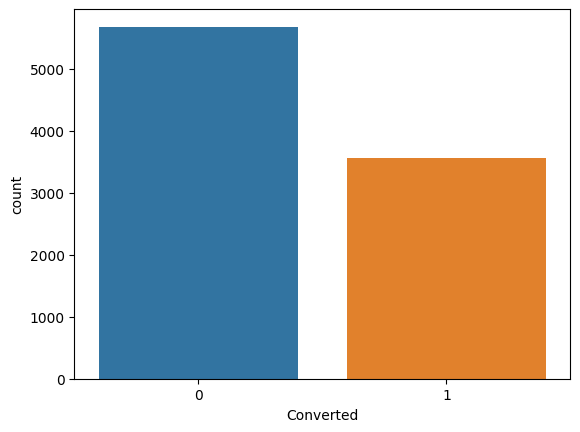

In [ ]:
sns.countplot(data=new_df,x='Converted')
plt.show()

With the help of the countplot we can see that 3561 people have sucessfully covert to paying customer for the edu-tech platform and reaming of them are not converted

*   1- Represent Sucessful conversion(the lead became paying customer)
*   0- Represent that the lead did not convert.





In [ ]:
new_df['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

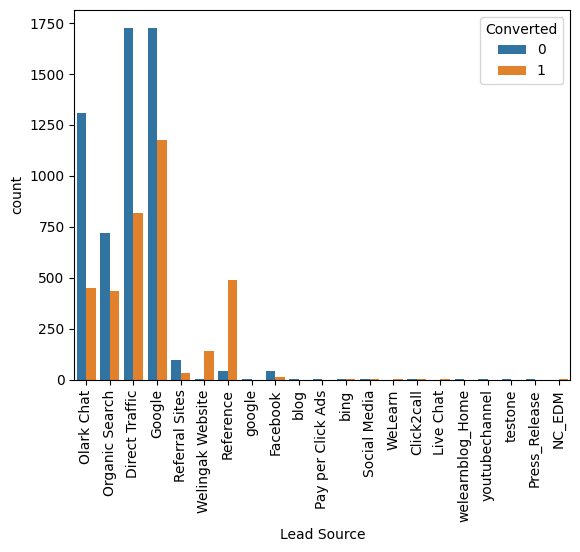

In [ ]:
sns.countplot(data=new_df,x='Lead Source',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

We can clearly see that most of the people are seeing advertisement on Google and if they visit that advertisement there is high probability to convert the customer into paying customer for edu-tech platform compare to other sites.

The company should mainly focused on the below categories:


*   Google
*   Direct Traffic
*   Reference
*   Olark Chat
*   Organic Search









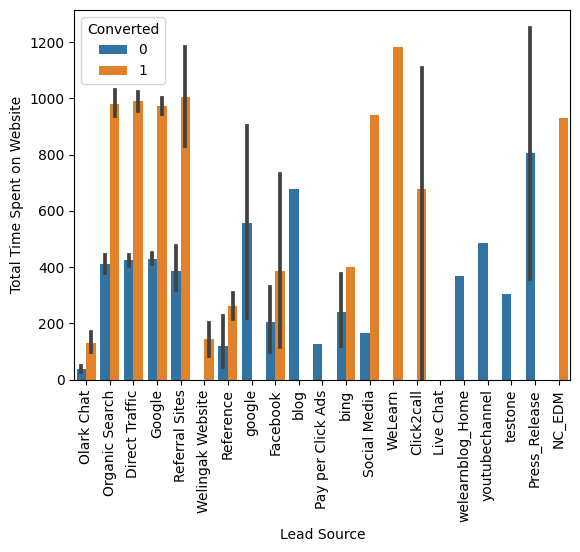

In [ ]:
sns.barplot(data=new_df,x='Lead Source',y='Total Time Spent on Website',hue='Converted')
plt.xticks(rotation=90)
plt.show()

With the help of the above bar chart we can clearly indentified people who spends the high time on the "total time spent on website" they have the high probability to convert the customer into paying customer for edu-tech.



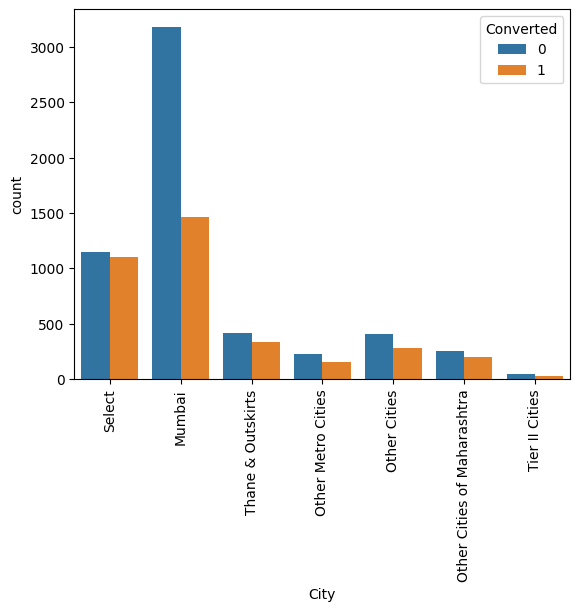

In [ ]:
sns.countplot(data=new_df,x='City',hue='Converted')
plt.xticks(rotation=90)
plt.show()

According to this dataset mumbai has convert the major customer to the paying customer

In [ ]:
df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

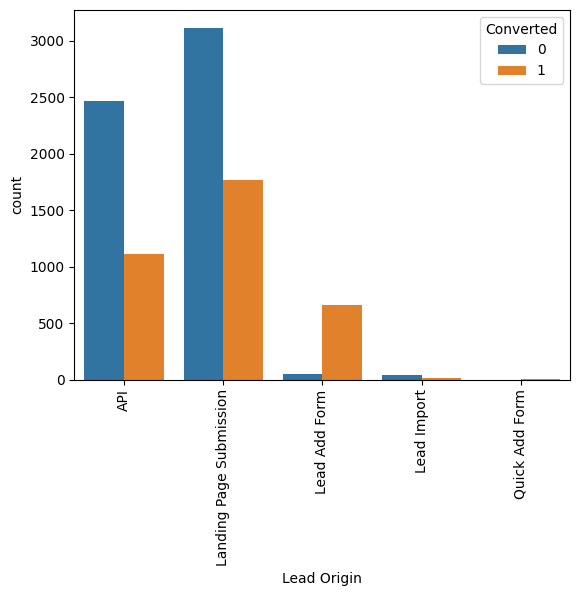

In [ ]:
sns.countplot(data=new_df,x='Lead Origin',hue='Converted')
plt.xticks(rotation=90)
plt.show()

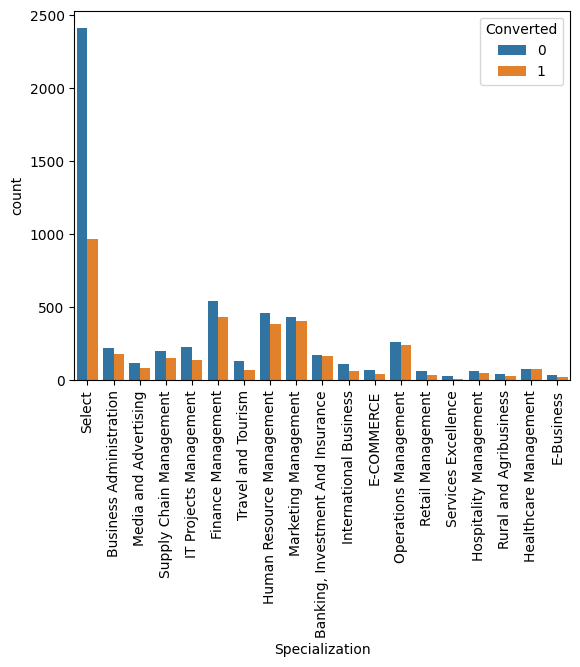

In [ ]:
sns.countplot(data=new_df,x='Specialization',hue='Converted')
plt.xticks(rotation=90)
plt.show()

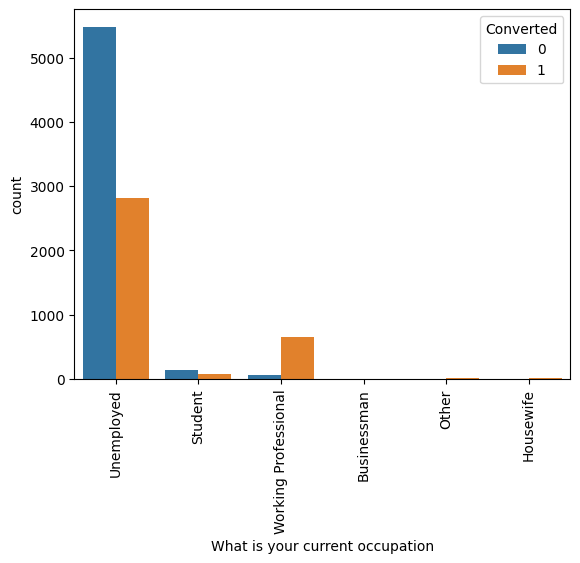

In [ ]:
sns.countplot(data=new_df,x='What is your current occupation',hue='Converted')
plt.xticks(rotation=90)
plt.show()

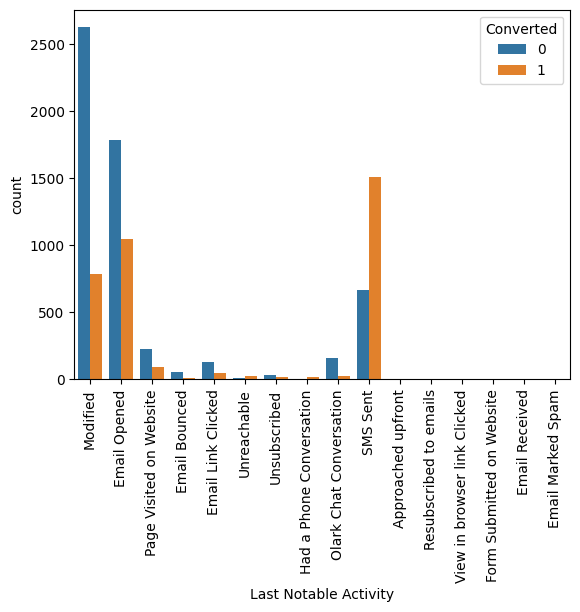

In [ ]:
sns.countplot(data=new_df,x='Last Notable Activity',hue='Converted')
plt.xticks(rotation=90)
plt.show()

With the help of the above count plot we can clearly see that the unemployed people having high probability to convert into paying customer so, the company should focus more on the unemployed people and then working professional and so on..

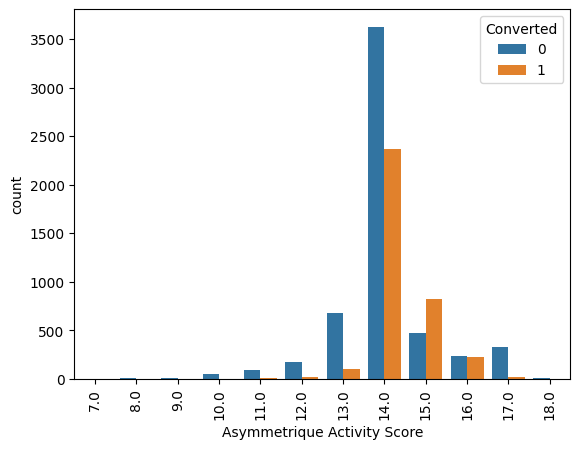

In [ ]:
sns.countplot(data=new_df,x='Asymmetrique Activity Score',hue='Converted')
plt.xticks(rotation=90)
plt.show()

**Encoding**

**Ordinal Encoding For Lead Origin based on Converted**


Landing page submission have the higher weigthage because they converting high number of customers to paying customer follwed by API, Lead Add Form, Lead Import and Quick Add Form  

Landing page submission-5
API-4
Lead Add Form-3
Lead Import-2
Quick Add Form -1

In [ ]:
mapping_lead_origin={"Landing Page Submission":5,"API":4,"Lead Add Form":3,"Lead Import":2,"Quick Add Form":1}
new_df['Lead Origin']=df['Lead Origin'].map(mapping_lead_origin)

**Ordinal encoding for Lead source based on Converted**

Google                 13
Direct Traffic         12
Olark Chat             11
Organic Search         10
Reference               9
Welingak Website        8
Referral Sites          7
Facebook                6
bing                    5
google                  4
Click2call              3
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [ ]:
mapping_lead_source={"Google":12,"google":12,"Direct Traffic":11,"Olark Chat":10,"Organic Search":9,"Reference":8,"Welingak Website":7,"Referral Sites":6,"Facebook":5,"bing":4,"Click2call":3,
                     "Press_Release":2,"Social Media":2,"Live Chat":2,"youtubechannel":1,"testone":1,"Pay per Click Ads":1,"welearnblog_Home":1,"WeLearn":1,"blog":1,"NC_EDM":1}
new_df['Lead Source']=new_df['Lead Source'].map(mapping_lead_source)

In [ ]:
mapping_do_not_email={"No":0,"Yes":1}
new_df['Do Not Email']=new_df['Do Not Email'].map(mapping_do_not_email)

In [ ]:
mapping_do_not_call={"No":0,"Yes":1}
new_df['Do Not Call']=new_df['Do Not Call'].map(mapping_do_not_call)

In [ ]:
mapping_last_activity={"Email Opened":15,"SMS Sent":14,"Olark Chat Conversation":13,"Page Visited on Website":12,"Converted to Lead":11,"Email Bounced":10,"Email Link Clicked":9,
                       "Form Submitted on Website":8,"Unreachable":7,"Unsubscribed":6,"Had a Phone Conversation":5,"Approached upfront":4,"View in browser link Clicked":3,"Email Received":2,"Email Marked Spam":2,"Visited Booth in Tradeshow":1,"Resubscribed to emails":1}
new_df['Last Activity']=new_df['Last Activity'].map(mapping_last_activity)

In [ ]:
mapping_specialization={"Select":18,"Finance Management":17,"Human Resource Management":16,"Marketing Management":15,"Operations Management":14,"Business Administration":13,"IT Projects Management":12,"Supply Chain Management":11,"Banking, Investment And Insurance":10,
                        "Travel and Tourism":9,"Media and Advertising":9,"International Business":8,"Healthcare Management":7,"Hospitality Management":6,"E-COMMERCE":5,"Retail Management":4,"Rural and Agribusiness":3,"E-Business":2,"Services Excellence":1}
new_df['Specialization']=new_df['Specialization'].map(mapping_specialization)

In [ ]:
mapping_how_x_education={"Select":10,"Online Search":9,"Word Of Mouth":8,"Student of SomeSchool":7,"Other":6,"Multiple Sources":5,"Advertisements":4,"Social Media":3,"Email":2,"SMS":1}
new_df['How did you hear about X Education']=new_df['How did you hear about X Education'].map(mapping_how_x_education)

In [ ]:
mapping_current_occupation={"Unemployed":6,"Working Professional":5,"Student":4,"Other":3,"Housewife":2,"Businessman":1}
new_df['What is your current occupation']=new_df['What is your current occupation'].map(mapping_current_occupation)

In [ ]:
mapping_search={"No":0,"Yes":1}
new_df['Search']=new_df['Search'].map(mapping_search)

In [ ]:
mapping_newspaper_article={"No":0,"Yes":1}
new_df['Newspaper Article']=new_df['Newspaper Article'].map(mapping_newspaper_article)

In [ ]:
mapping_x_education_forums={"No":0,"Yes":1}
new_df['X Education Forums']=new_df['X Education Forums'].map(mapping_x_education_forums)

In [ ]:
mapping_magazine={"No":0,"Yes":1}
new_df['Magazine']=new_df['Magazine'].map(mapping_magazine)

In [ ]:
mapping_newspaper={"No":0,"Yes":1}
new_df['Newspaper']=new_df['Newspaper'].map(mapping_newspaper)

In [ ]:
mapping_digital_ad={"No":0,"Yes":1}
new_df['Digital Advertisement']=new_df['Digital Advertisement'].map(mapping_digital_ad)

In [ ]:
mapping_through_recommendation={"No":0,"Yes":1}
new_df['Through Recommendations']=new_df['Through Recommendations'].map(mapping_through_recommendation)

In [ ]:
mapping_recieve_more_updates={"No":0,"Yes":1}
new_df['Receive More Updates About Our Courses']=new_df['Receive More Updates About Our Courses'].map(mapping_recieve_more_updates)

In [ ]:
mapping_update_me_supply_chain={"No":0,"Yes":1}
new_df['Update me on Supply Chain Content']=new_df['Update me on Supply Chain Content'].map(mapping_update_me_supply_chain)

In [ ]:
mapping_get_updates_dm={"No":0,"Yes":1}
new_df['Get updates on DM Content']=new_df['Get updates on DM Content'].map(mapping_get_updates_dm)

In [ ]:
mapping_lead_profile={"Potential Lead":5,"Select":6,"Other Leads":4,"Student of SomeSchool":3,"Lateral Student":2,"Dual Specialization Student":1}
new_df['Lead Profile']=new_df['Lead Profile'].map(mapping_lead_profile)

In [ ]:
mapping_cities={"Mumbai":7,"Select":6,"Thane & Outskirts":5,"Other Cities":4,"Other Cities of Maharashtra":3,"Other Metro Cities":2,"Tier II Cities":1}
new_df['City']=new_df['City'].map(mapping_cities)

In [ ]:
mapping_check={"No":0,"Yes":1}
new_df['I agree to pay the amount through cheque']=new_df['I agree to pay the amount through cheque'].map(mapping_check)

In [ ]:
mapping_free_copy={"No":0,"Yes":1}
new_df['A free copy of Mastering The Interview']=new_df['A free copy of Mastering The Interview'].map(mapping_free_copy)

In [ ]:
mapping_last_notable_activity={"Modified":12,"Email Opened":11,"SMS Sent":10,"Page Visited on Website":9,"Olark Chat Conversation":8,"Email Link Clicked":7,"Email Bounced":6,"Unsubscribed":5,"Unreachable":4,"Had a Phone Conversation":3,
                               "Email Marked Spam":2,"Approached upfront":1,"Resubscribed to emails":1,"View in browser link Clicked":1,"Form Submitted on Website":1,"Email Received":1}
new_df['Last Notable Activity']=new_df['Last Notable Activity'].map(mapping_last_notable_activity)

In [ ]:
new_df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,4,10,0,0,0,0.0,0,0.00,...,0,0,0,6,6,15.0,15.0,0,0,12
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,4,9,0,0,0,5.0,674,2.50,...,0,0,0,6,6,15.0,15.0,0,0,11
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,5,11,0,0,1,2.0,1532,2.00,...,0,0,0,5,7,14.0,20.0,0,1,11
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,5,11,0,0,0,1.0,305,1.00,...,0,0,0,6,7,13.0,17.0,0,0,12
4,3256f628-e534-4826-9d63-4a8b88782852,660681,5,12,0,0,1,2.0,1428,1.00,...,0,0,0,6,7,15.0,18.0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,5,11,1,0,1,8.0,1845,2.67,...,0,0,0,5,7,15.0,17.0,0,0,2
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,5,11,0,0,0,2.0,238,2.00,...,0,0,0,5,7,14.0,19.0,0,1,10
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,5,11,1,0,0,2.0,199,2.00,...,0,0,0,5,7,13.0,20.0,0,1,10
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,5,12,0,0,1,3.0,499,3.00,...,0,0,0,6,2,15.0,16.0,0,0,10


In [ ]:
evaluation=new_df.drop(['Prospect ID','Lead Number'],axis=1)

In [ ]:
evaluation.shape

(9240, 29)

**Spliting Independent variable and Dependent Variable**

In [ ]:
X=evaluation.drop("Converted",axis=1)
y=evaluation['Converted']

In [ ]:
X.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,...,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,4,10,0,0,0.0,0,0.0,12,18,10,...,0,0,0,6,6,15.0,15.0,0,0,12
1,4,9,0,0,5.0,674,2.5,15,18,10,...,0,0,0,6,6,15.0,15.0,0,0,11
2,5,11,0,0,2.0,1532,2.0,15,13,10,...,0,0,0,5,7,14.0,20.0,0,1,11
3,5,11,0,0,1.0,305,1.0,7,9,8,...,0,0,0,6,7,13.0,17.0,0,0,12
4,5,12,0,0,2.0,1428,1.0,11,18,6,...,0,0,0,6,7,15.0,18.0,0,0,12


In [ ]:
y

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9240, dtype: int64

**Logistic Regression**

In [ ]:
model=LogisticRegression()
X_train,X_eval,y_train,y_eval=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)
model.fit(X_train,y_train)
yhat=model.predict(X_eval)
accuracy=accuracy_score(y_eval,yhat)
print("Acuuracy_score:",accuracy)
confusion=confusion_matrix(yhat,y_eval)
print("Confusion Matrix:")
print(confusion)
precision=precision_score(y_eval,yhat)
print("Precision_score:",precision)
recall=recall_score(y_eval,yhat)
print("Recal_score:",recall)

Acuuracy_score: 0.79004329004329
Confusion Matrix:
[[996 248]
 [140 464]]
Precision_score: 0.7682119205298014
Recal_score: 0.651685393258427


**Decision Tree Classifier**

In [ ]:
model_dtc=dtc()
X_train,X_eval,y_train,y_eval=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)
model_dtc.fit(X_train,y_train)
yhat_dtc=model_dtc.predict(X_eval)
confusion_dtc=confusion_matrix(y_eval,yhat_dtc)
accuracy_dtc=accuracy_score(y_eval,yhat_dtc)
print("Accuracy_Score:",accuracy_dtc)
print("Confusion_Matrix:")
print(confusion_dtc)
precision_dtc=precision_score(y_eval,yhat_dtc)
print("Precision_score:",precision_dtc)
recall_dtc=recall_score(y_eval,yhat_dtc)
print("Recall_score:",recall_dtc)


Accuracy_Score: 0.8062770562770563
Confusion_Matrix:
[[961 175]
 [183 529]]
Precision_score: 0.7514204545454546
Recall_score: 0.7429775280898876


**Random Forest Classifier**

In [ ]:
model_rfc=rfc()
model_rfc.fit(X_train,y_train)
yhat_rfc=model_rfc.predict(X_eval)
accuracy_rfc=accuracy_score(y_eval,yhat_rfc)
print("Accuracy_Score:",accuracy_rfc)
confusion_rfc=confusion_matrix(y_eval,yhat_rfc)
print("Confusion_Matrix:")
print(confusion_rfc)
precision_rfc=precision_score(y_eval,yhat_rfc)
print("Precision_score:",precision_rfc)
recall_rfc=recall_score(y_eval,yhat_rfc)
print("Recall_score:",recall_rfc)




Accuracy_Score: 0.8598484848484849
Confusion_Matrix:
[[1029  107]
 [ 152  560]]
Precision_score: 0.8395802098950524
Recall_score: 0.7865168539325843


**Suggestion/Conclusion**

**Which leads are most likely to convert into paying customers?**

1.What is your current occupation
2.Lead Source
3.Total Time Spent on Website

According to me the above three things have strong probability to change customer to paying customer for the edu tech platform





**What marketing and sales strategies can be tailored to specific lead segments?**

**1.Targeting Unemployed customers:**
High Conversion Potential: You correctly identify that unemployed individuals may have a higher motivation to enhance their skills and knowledge to improve their employment prospects. This group may be more likely to become paying customers for educational services.

**2.Lead Source Prioritization:**
  

*   Google
*   Direct Traffic
*   Reference
*   Olark Chat


The company should mainly focused on the above points beacuse lot of people visiting above lead source and also the company also need to focus on instagram because Instagram is a popular platform among younger audiences. Create engaging visual content and campaigns targeting this demographic. Use Instagram advertising to reach a wider audience.















**How can the lead management process be streamlined and made more effective?**

**Customer Feedback:**

Gather feedback from leads and customers to understand their needs and preferences. Use this feedback to improve lead management processes and offerings.